In [1]:
install.packages("tidyverse")
install.packages("gapminder")
install.packages("ggrepel")
install.packages("patchwork")
install.packages("devtools")
devtools::install_github("thomasp85/patchwork")
library('tidyverse')
library('gapminder')
library('ggrepel')
library('patchwork')
df.1952 = gapminder %>% filter(year == 1952)
df.2002 = gapminder %>% filter(year == 2002)
df.1952.kuwait = df.1952 %>% filter(country == 'Kuwait') 
df.2002.kuwait = df.2002 %>% filter(country == 'Kuwait')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘patchwork’ is not available (for R version 3.6.0)”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'patchwork' from a github remote, the SHA1 (36b49187) has not changed since last install.
  Use `force = TRUE` to force installation

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dpl

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



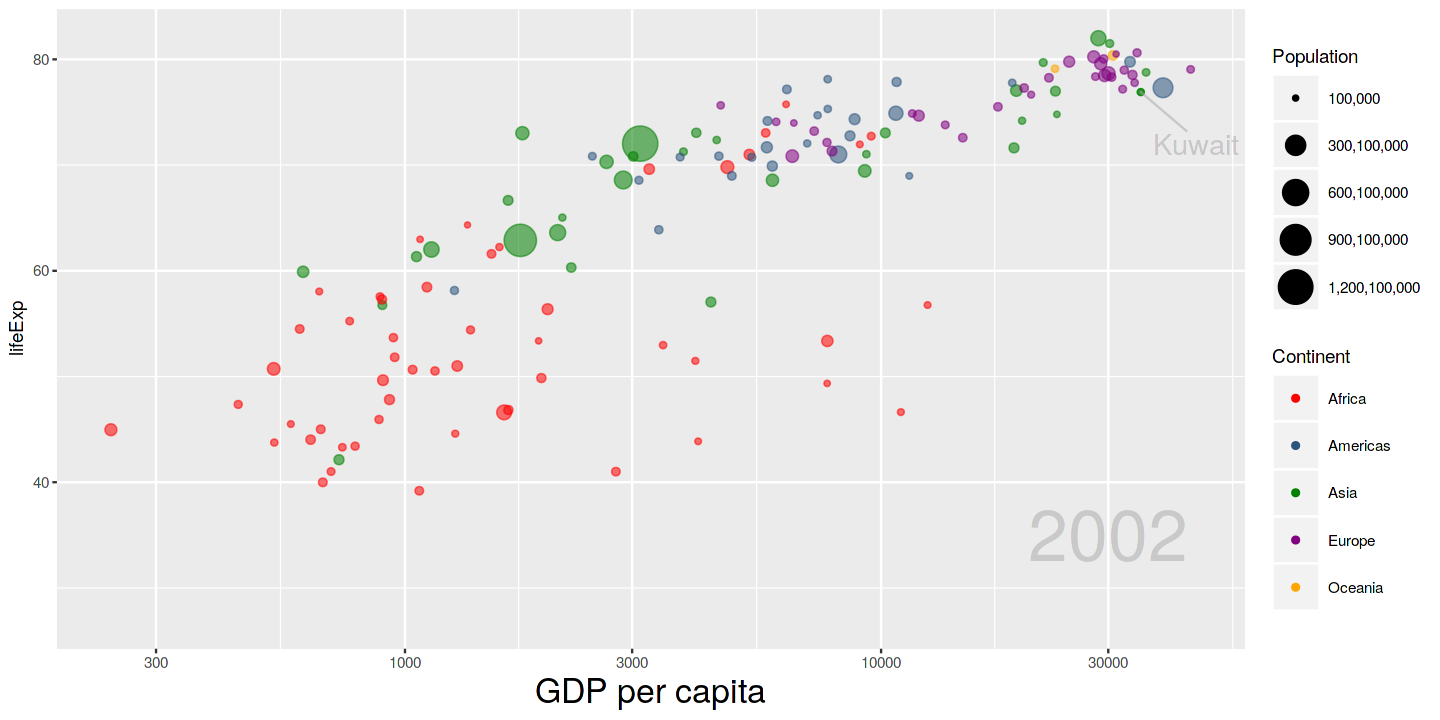

In [78]:
#Combines the 2002 datasets to plot on one point
comb.2002 = rbind(df.2002,df.2002.kuwait)

p = ggplot(comb.2002, aes(x = gdpPercap, y=lifeExp, color = continent, size = pop, alpha = 0.5))
p = p + geom_point()
p = p + annotate("text", x = 30000, y = 35, label = "2002", size = 15,
                     color = 'grey', alpha = 0.75)
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma, name = "Population")
p = p + scale_y_continuous(name = NULL)
p = p + geom_text_repel(data = df.2002.kuwait, vjust = 3,
                        hjust = -5, color = "darkgrey",
                        show.legend = FALSE, label = 'Kuwait', size = 6)
p = p + scale_x_log10(name = "GDP per capita") + theme(axis.title.x = element_text(size = 20), legend.key.size = unit(1, "cm"))

p = p + ylim(c(27,82))
p = p + guides(alpha=FALSE) + 
               scale_color_manual(values=c('#FF0000', '#2B547E', '#008000','#800080','#FFA500'),name="Continent")
p

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



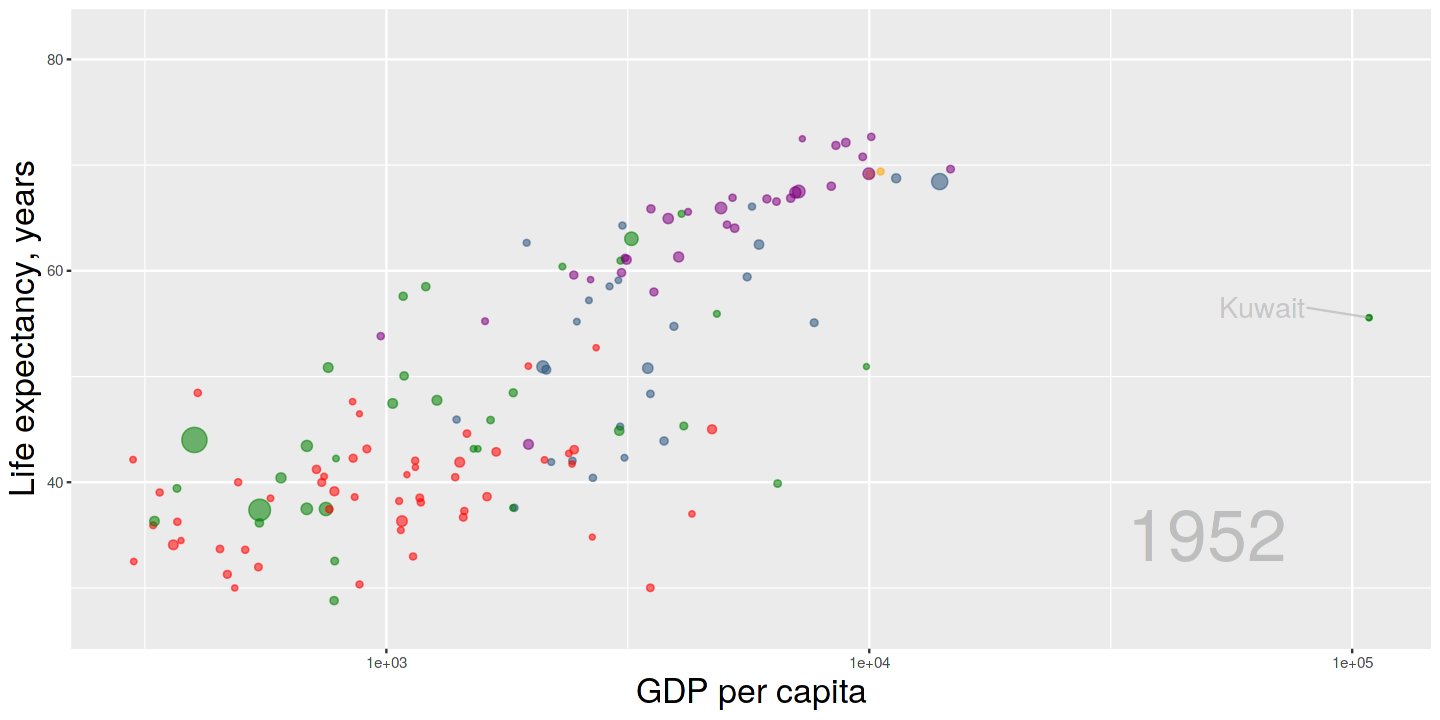

In [71]:
comb.1952 = rbind(df.1952,df.1952.kuwait)

q = ggplot(comb.1952, aes(x = gdpPercap, y=lifeExp, color = continent, size = pop, alpha = 0.5))
q = q + geom_point()
q = q + annotate("text", x = 50000, y = 35, 
                 label = "1952", size = 15, color = 'grey', 
                 alpha = 1)
q = q + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma, 
                   name = "Population")
q = q + scale_y_continuous(name = "Life expectancy, years")
q = q + geom_text_repel(data = df.1952.kuwait, 
                        vjust = 0.001, hjust = 1.75, 
                        color = "darkgrey", 
                        show.legend = FALSE, label = 'Kuwait', size = 6)
q = q + scale_x_log10(name = "GDP per capita") + ylab("Life expectancy, years")
q = q + theme(axis.title.y = element_text(size = 20), 
              axis.title.x = element_text(size = 20))
q = q + ylim(c(27,82))
q = q + guides(alpha=FALSE) + 
               scale_color_manual(values=c('#FF0000', '#2B547E', 
                                           '#008000','#800080',
                                           '#FFA500'),
                                  name="Continent")
q = q + theme(legend.position = "none")
q

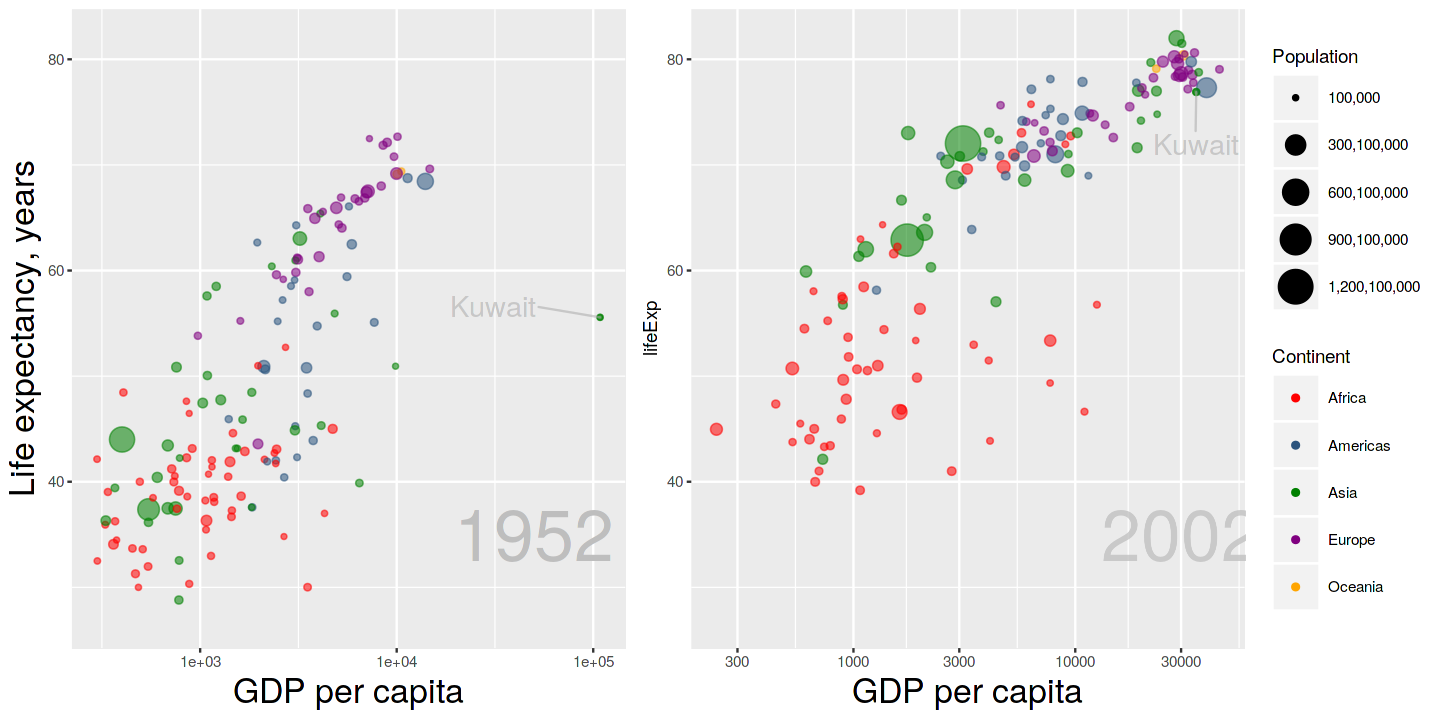

In [79]:
options(repr.plot.width=12, repr.plot.height = 6)

q + p
